#                                  A/B тестирование

***Постановка задачи:***

Задача от международного интернет-магазина. Запущен А/B-тест. Имеются техническое задание и результаты теста

***Техническое задание:***

•	Название теста: recommender_system_test;

•	Группы: А (контрольная), B (новая платежная воронка);

•	Дата запуска: 2020-12-07

•	Дата остановки набора новых пользователей: 2020-12-21;

•	Дата остановки: 2021-01-04

•	Аудитория: 15% новых пользователей из региона EU;

•	Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;

•	Ожидаемый эфект: за 14 дней с момента регистрации в системе пользователи покажут лучшую конверсию в просмотр карточек товаров (событие product_page), просмотр корзины товаров (событие product_card) и покупку (purchase). На каждом из шагов воронки product_page → product_card → purchase улучшение составит не менее 10%;

•	Ожидаемое количество участников теста: 6000.


***Необходимо:***
1. Провести исследовательский анализ данных
2. Провести оценку результатов A/B-тестирования
3. Сделать вывод по полученным результатм

## Cодержание
* [Шаг 1. Исследуйте данные](#1-bullet)
* [Шаг 2. Проведите исследовательский анализ данных](#2-bullet)
* 2.1.[Исследование конверсии в воронке на разных этапах](#2-1-bullet)
* 2.2. [Обладают ли выборки одинаковыми распределениями количества событий на пользователя](#2-2-bullet)
* 2.3. [Присутствуют ли в выборках одни и те же пользователи](#2-3-bullet)
* 2.4. [Как число событий распределено по дням](#2-4-bullet)
* 2.5. [Нюансы данных, которые нужно учесть, прежде чем приступать к A/B-тестированию](#2-5-bullet)
* 2.6. [Пользователи из двух экспериментальных групп в тесте recommender_system_test](#2-6-bullet)
* [Шаг 3. Проведите оценку результатов A/B-тестирования](#3-bullet)
* [Шаг 4. Выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования](#4-bullet)


### Шаг 1. Исследуйте данные<a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_marketing_events = pd.read_csv('ab_project_marketing_events.csv')

In [3]:
project_marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


   
**Структура файла ab_project_marketing_events.csv:**
- name — название маркетингового события;
- regions — регионы, в которых будет проводиться рекламная кампания;
- start_dt — дата начала кампании;
- finish_dt — дата завершения кампании

In [4]:
project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes



    
* В таблице 14 строк и 4 колонки.
* пропущенных значений нет
* в колонках start_dt и finish_dt необходимо изменить тип данных, перевести строковые значения в дату 

In [5]:
project_marketing_events['start_dt'] = pd.to_datetime(project_marketing_events['start_dt'], format='%Y-%m-%d')

In [6]:
project_marketing_events['finish_dt'] = pd.to_datetime(project_marketing_events['finish_dt'], format='%Y-%m-%d')

In [7]:
project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


**Проверка на наличие дубликатов**

In [8]:
project_marketing_events['name'].value_counts()

Victory Day CIS (May 9th) Event     1
CIS New Year Gift Lottery           1
St. Valentine's Day Giveaway        1
4th of July Promo                   1
Single's Day Gift Promo             1
Easter Promo                        1
International Women's Day Promo     1
St. Patric's Day Promo              1
Christmas&New Year Promo            1
Dragon Boat Festival Giveaway       1
Labor day (May 1st) Ads Campaign    1
Chinese Moon Festival               1
Chinese New Year Promo              1
Black Friday Ads Campaign           1
Name: name, dtype: int64

    В колонке ['name'] дубликаты отсутствуют. 

In [9]:
project_marketing_events['regions'].value_counts()

APAC                        4
EU, CIS, APAC, N.America    3
CIS                         2
EU, N.America               2
EU, CIS, APAC               2
N.America                   1
Name: regions, dtype: int64

    В колонке ['regions'] дубликаты отсутствуют

In [10]:
project_marketing_events.duplicated().sum()

0

    В датасете project_marketing_events дубликаты отсутствуют

In [11]:
ab_new_users = pd.read_csv('final_ab_new_users.csv')

In [12]:
ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone



    
**Структура файла final_ab_new_users.csv:**
- user_id — уникальный идентификатор пользователя;
- first_date — дата регистрации;
- region — регион, к которому относится пользователь;
- device — устройство, с которого происходила регистрация.

In [13]:
ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


    
* В таблице 61733 строки и 4 колонки
* Пропущенные значения отсутствуют
* в колонке "first_date" необходимо изменить тип данных, перевести строковые значения в дату 

In [14]:
ab_new_users['first_date'] = pd.to_datetime(ab_new_users['first_date'], format='%Y-%m-%d')

In [15]:
ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


**Проверяем датасет ab_new_users на наличие дубликатов**

In [16]:
ab_new_users.duplicated().sum()

0

    Проверяем колонки  ['region'] и ['device'] на наличие дубликатов

    Нас интересуют пользователи из региона EU

In [17]:
ab_new_users['region'].value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [18]:
ab_new_users['device'].value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

    В колонках  ['region'] и ['device'] дубликаты отсутствуют

In [19]:
final_ab_participants = pd.read_csv('final_ab_participants.csv')

In [20]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test



    
**Структура файла final_ab_participants.csv:**
- user_id — уникальный идентификатор пользователя;
- ab_test — название теста;
- group — группа, в которой находился пользователь в рамках теста    

In [21]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB



    
* В таблице 18268 строк и 3 колонки
* пропущенные значения отсутствуют
* типы данных корректные

**Проверяем датасет final_ab_participants на наличие дубликатов**

In [22]:
final_ab_participants.duplicated().sum()

0



    В датасете final_ab_participants дубликаты отсутствуют

In [23]:
final_ab_participants['group'].value_counts()

A    9655
B    8613
Name: group, dtype: int64

In [24]:
final_ab_participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

   
    Дубликаты в колонках ['group'] и ['ab_test'] отсутствуют.    
    Группы: А (контрольная), B (новая платежная воронка)    
    Нас интересует только тест - recommender_system_test

In [25]:
final_ab_events = pd.read_csv('final_ab_events.zip')

In [26]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


**Структура файла final_ab_events.csv:**
- user_id — уникальный идентификатор пользователя;
- event_dt — дата и время покупки;
- event_name — наименование типа события;
- details — дополнительные данные о событии. Например, в этом поле хранится стоимость покупки (USD) для события «покупка» (purchase);

In [27]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


* В таблице 440317 строк и 4 колонки
* пропущенные значения в колонке ['details']. Оставим их без изменения, так как стоимость покупки может быть только у "purchase"
* в колонке ['event_dt'] необходимо изменить тип данных, перевести строковые значения в дату       

In [28]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


**Проверяем датасет final_ab_events на наличие дубликатов**

In [30]:
final_ab_events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64


    Дубликаты в колонке ['event_name'] отсутствуют

In [31]:
final_ab_events.duplicated().sum()

0


    
    Дубликаты в датасете final_ab_events отсутствуют

### Шаг 2. Проведите исследовательский анализ данных<a class="anchor" id="2-bullet"></a>

**2.1. Исследование конверсии в воронке на разных этапах**<a class="anchor" id="2-1-bullet"></a>

   
    Посмотрим, какие события есть в датасете, как часто они встречаются.
    Отсортируем события по частоте

In [32]:
events_count = final_ab_events.groupby('event_name').agg({'user_id':'count'}).reset_index().sort_values(by='user_id', ascending=False)
events_count.rename(columns={'user_id': 'quantity_events'}, inplace=True)
events_count

,event_name,quantity_events
0,login,189552
2,product_page,125563
3,purchase,62740
1,product_cart,62462



Всего 4 событий, отсортированы по частоте:
    
* login - регистрация пользователя
* product_page - посещение страницы с товаром
* purchase - заказ
* product_cart - добавление товара в корзину
    
Каким-то образом некоторые пользователи делают заказ, миновав шаг "добавление заказа в корзину". Так как на этом шаге транзакций меньше, чем на шаге "заказ"

**Построим воронку по уникальным пользователям, совершивщим события**

In [33]:
funnel_of_events = final_ab_events.groupby('event_name').agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id', ascending=False)
funnel_of_events.rename(columns={'user_id': 'quantity_events'}, inplace=True)
funnel_of_events

,event_name,quantity_events
0,login,58697
2,product_page,38929
3,purchase,19569
1,product_cart,19284


    По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки
    (от числа пользователей на предыдущем). То есть для последовательности событий
    A → B → C → D, посчитайте отношение числа пользователей с событием B к количеству
    пользователей с событием A

In [34]:
conversion_step2 = round(38929/58697*100)
conversion_step3 = round(19569/38929*100)
conversion_step4 = round(19284/19569*100)

In [35]:
print('% пользователей перешедших на второй этап: {}'.format(conversion_step2))
print('% пользователей перешедших на третий этап: {}'.format(conversion_step3))
print('% пользователей перешедших на четвертый этап: {}'.format(conversion_step4))

% пользователей перешедших на второй этап: 66
% пользователей перешедших на третий этап: 50
% пользователей перешедших на четвертый этап: 99


    Больше всего теряется пользователей на третьем этапе.
    Только 50% пользователей совершают покупку после просмотра страницы с товаром.

    На втором этапе теряется 36% пользователей.
    После регистрации 66% пользователей просматривают страницы с товаром. 

    между этапом добавление товара в корзину и заказом - конверсия 99%
    
    Опять же подозрительно выглядят данные, что полльзователей совершивших заказ больше,
    чем пользователей, добавивших товар в корзину. Какие-то пользователи миновали данный этап.

**2.2. Обладают ли выборки одинаковыми распределениями количества событий на пользователя?**<a class="anchor" id="2-2-bullet"></a>

**Сколько всего событий в датасете?**

In [36]:
events = len(final_ab_events)
print('Всего событий в логе: {}'.format(events), 'шт.')

Всего событий в логе: 440317 шт.


**Сколько всего пользователей в датасете?**

In [37]:
users = final_ab_events['user_id'].nunique()
print('Всего уникальных пользователей в логе: {}'.format(users))

Всего уникальных пользователей в логе: 58703


**Cколько в среднем событий приходится на пользователя?**

    Чтобы определить, сколько в среднем событий приходится на пользователя, найдем меры
    центральной тенденции: среднее значение, медиана и мода.


In [38]:
mean = final_ab_events.groupby('user_id')['event_name'].count().mean().round()
print('В среднем на одного пользователя приходится событий: {}'.format(mean))

В среднем на одного пользователя приходится событий: 8.0


In [39]:
median = final_ab_events.groupby('user_id')['event_name'].count().median().round()
print('В среднем на одного пользователя приходится событий: {}'.format(median))

В среднем на одного пользователя приходится событий: 6.0


In [40]:
mode = final_ab_events.groupby('user_id')['event_name'].count().mode()
print('В среднем на одного пользователя приходится событий: {}'.format(mode))

В среднем на одного пользователя приходится событий: 0    6
dtype: int64


    В среднем на пользователя приходится 6 событий. Значение медианы и моды совпало.
    
    Посмотрим на распределение событий на пользователя:

In [41]:
final_ab_events.groupby('user_id')['event_name'].count().describe()

count    58703.000000
mean         7.500758
std          4.230392
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
Name: event_name, dtype: float64

In [42]:
events_per_user = final_ab_events.groupby('user_id')['event_name'].count().reset_index()

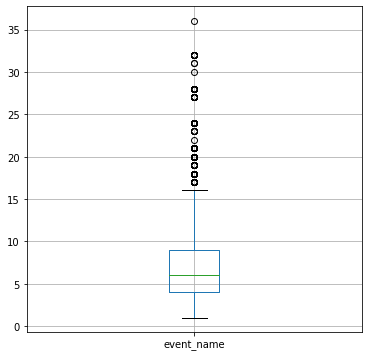

In [43]:
events_per_user.boxplot(column='event_name', figsize=(6,6))

    
    * на 25% пользователей приходится 4 события.
    
    * на 50% пользователей приходится до 6 событий.
    
    * на 75 % пользователей приходится до 9 событий.
    
    * выбросы начинаются от 16 до 36 событий на 1 пользователя.
    Максимальный выброс - 36 событий на одного пользователя

**2.3. Присутствуют ли в выборках одни и те же пользователи?**<a class="anchor" id="2-3-bullet"></a>

In [44]:
final_ab_participants['user_id'].count()
print('Количество пользователей в выборках: {}'.format(events), 'человек.')

Количество пользователей в выборках: 440317 человек.


In [45]:
final_ab_participants['user_id'].nunique()
print('Количество уникальных пользователей в выборках: {}'.format(events), 'человек.')

Количество уникальных пользователей в выборках: 440317 человек.


In [46]:
final_ab_participants.groupby('user_id')['group'].nunique().describe()

count    16666.000000
mean         1.046562
std          0.210705
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: group, dtype: float64

    Видим, что одни и теже пользователи могут быть в разных выборках ( и в группе А и в группе В).
    Максимальное значение - пользователь учавствует в двух выборках. Посмотрим на 5 случайных
    таких пользователей.

In [47]:
user_in_2_groups = final_ab_participants.groupby('user_id').agg({'group':'nunique'})
user_in_2_groups = user_in_2_groups[user_in_2_groups['group'] == 2]
user_in_2_groups

,group
user_id,
0082295A41A867B5,2
00E68F103C66C1F7,2
02313B9E82255F47,2
023D4A062F40F10B,2
040F6DD6E792D0AB,2
...,...
FEA0C585A53E7027,2
FEC0BCA6C323872F,2
FEE7040D7D2F2968,2


In [48]:
users_in_2_groups = ['0082295A41A867B5', '00E68F103C66C1F7', '02313B9E82255F47', '023D4A062F40F10B', '040F6DD6E792D0AB']

In [49]:
final_ab_participants.query('user_id in @users_in_2_groups').groupby('user_id').head(10)


,user_id,group,ab_test
585,02313B9E82255F47,A,recommender_system_test
869,023D4A062F40F10B,B,recommender_system_test
1278,040F6DD6E792D0AB,A,recommender_system_test
4074,00E68F103C66C1F7,A,recommender_system_test
4768,0082295A41A867B5,A,recommender_system_test
13448,023D4A062F40F10B,A,interface_eu_test
14161,0082295A41A867B5,B,interface_eu_test
15494,040F6DD6E792D0AB,B,interface_eu_test
15562,00E68F103C66C1F7,B,interface_eu_test
18130,02313B9E82255F47,B,interface_eu_test


    Видим, что 776 пользователей попали сразу и в группу А и в группу В.
    
    Но они принимали участия в разных тестах, либо в тесте recommender_system_test от группы А,
    либо interface_eu_test от группы В. Нет пользователей, которые приняли бы участие в одном
    тесте сразу в двух группах.
    
    По техническому заданию нас интересует только тест "recommender_system_test". Проверим
    на всем датасете, есть ли пользователи, которые принимали участие в этом тесте и попали
    сразу в обе группы.

In [50]:
final_ab_participants.query('ab_test == "recommender_system_test"').groupby('user_id')['group'].nunique().describe()

count    6701.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: group, dtype: float64

    Все в порядке, в тесте "recommender_system_test" нет пользователей,
    которые приняли бы участие сразу в двух группах А и В.

    Проверия заодно и тест "interface_eu_test", так как в исследовательском анализе
    мы рассматриваем датасет в целом.

In [51]:
final_ab_participants.query('ab_test == "interface_eu_test"').groupby('user_id')['group'].nunique().describe()

count    11567.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: group, dtype: float64

    в тесте "interface_eu_test" нет пользователей, которые приняли бы участие сразу
    в двух группах А и В.

**2.4. Как число событий распределено по дням?**<a class="anchor" id="2-4-bullet"></a>

    Добавим отдельный столбец дат без времени;    

In [52]:
final_ab_events['date'] = final_ab_events.event_dt.dt.date
final_ab_events.head(3)

,user_id,event_dt,event_name,details,date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07


In [53]:
final_ab_events['date'].min()

datetime.date(2020, 12, 7)

In [54]:
final_ab_events['date'].max()

datetime.date(2020, 12, 30)

   
    Временные рамки: начало периода 2020-12-07, конец периода - 2020-12-30

Text(0.5, 1.0, 'Гистограмма по дате и событиям')

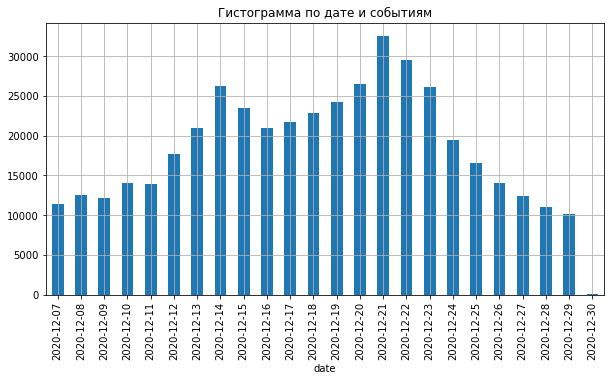

In [55]:
final_ab_events.groupby('date')['event_name'].count().plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Гистограмма по дате и событиям')

In [56]:
final_ab_events.groupby('date')['event_name'].count().describe()

count       24.000000
mean     18346.541667
std       7493.484399
min         89.000000
25%      12515.250000
50%      18516.500000
75%      23670.000000
max      32559.000000
Name: event_name, dtype: float64

    В среднем в день происходит 18 516 событий. 
    
    * у 25% дней зафиксировано количество событий ниже среднего уровня: от 10 000 до 12 515. Например, периоды 29-27 декабря и 07 декабря - 09 декабря. Это начало и окончание теста. 30 деабря зафиксировано минимальное количество событий, их практически не было.
    
    * у 25% дней зафиксировано количество событий: от 12 515 до 18 516 событий.
    Например, период с 25 по 26 декабря включительно и 12 декабря.
    
    * у 25 % дней зафиксировано количество событий: от 18 516 событий до 23670.
    Например, дни: 13,16,17,18,24 декабря
    
    * у 25 % дней зафиксировано количество событий: от 23670 до 32559 событий.
    Например, периоды: 14-15 декабря, 19-23 декабря.
    
    * Пиковый день, в которое произошло максимальное количество событий - 21 декабря.
    На втором месте 22 декабря. 

**2.5. Нюансы данных, которые нужно учесть, прежде чем приступать к A/B-тестированию**<a class="anchor" id="2-5-bullet"></a>

    Необходимо проверить, проходили ли в период теста какие-то маркетинговые события
    или праздники, влияющие на поведение пользователей / покупателей. Для этого необходимо
    сверится с таблицей "ab_project_marketing_events"

In [57]:
project_marketing_events.head(15)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


    Как мы ранее выяснили, данные по событиям собраны с 2020-12-07 по 2020-12-30.
    
    В последние 5 дней периода проходило маркетинговое событие "Christmas&New Year Promo"
    с 2020-12-25. Регион - EU, N.America. Пересечение А/В теста с маркетинговыми активностями
    не корректно, это может повлиять на разультаты А/В теста. 
    
    В последний день периода началось маркетинговое событие CIS New Year Gift Lottery
    с 2020-12-30. Так как это регион CIS, событие не влияет на разультаты А/В теста. 

**2.6. Проверим, что у нас есть пользователи из двух экспериментальных групп в тесте recommender_system_test**<a class="anchor" id="2-6-bullet"></a>


In [58]:
final_ab_participants.query('ab_test == "recommender_system_test"').groupby('group')['user_id'].nunique()

group
A    3824
B    2877
Name: user_id, dtype: int64

   
    В тесте "recommender_system_test" присутствуют пользователи обоих групп.

    В группе В на 947 пользователей меньше, чем в группе А, что составляет 24,77%.

### Шаг 3. Проведите оценку результатов A/B-тестирования<a class="anchor" id="3-bullet"></a>


    
Для проведения оценки результата A/B-тестирования необходимо создать сводную таблицу, в которой были бы:
    
* только новые пользователи из региона EU;
* только пользователи, принявшие участие в recommender_system_test
* информация к какой группе относится пользователь ( А/В)
* события
    
    
    
1. Отфильтруем таблицу ab_new_users по пользователям из региона EU
2. Отфильтруем таблицу final_ab_participants по только пользователи, принявшие участие в recommender_system_test
3. Соединим отфильтрованные таблицы ab_new_users, final_ab_participants и таблицу final_ab_events по полю  user_id  

In [59]:
ab_new_users_EU = ab_new_users[ab_new_users['region'] == "EU"]
ab_new_users_EU.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
9,FFCEA1179C253104,2020-12-07,EU,Android


In [60]:
ab_participants_RST = final_ab_participants[final_ab_participants['ab_test'] == "recommender_system_test"]
ab_participants_RST.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [61]:
users_EU_test_RST = ab_new_users_EU.merge(ab_participants_RST, on='user_id', how='left') 
users_EU_test_RST.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,NaN,NaN
2,50734A22C0C63768,2020-12-07,EU,iPhone,NaN,NaN
3,8942E64218C9A1ED,2020-12-07,EU,PC,NaN,NaN
4,FFCEA1179C253104,2020-12-07,EU,Android,NaN,NaN


    В таблице появились пустые значения: новые пользователи EU, которые не принимали
    участия в тесте. Удалим их.

In [62]:
users_EU_test_RST.dropna()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
7,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
13,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
16,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
28,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
...,...,...,...,...,...,...
46231,A09DFE27D4CFF8E8,2020-12-20,EU,Android,B,recommender_system_test
46238,0F7D49FC184EDCDE,2020-12-20,EU,PC,A,recommender_system_test
46249,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test
46250,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test


In [63]:
common_table = users_EU_test_RST.merge(final_ab_events, on='user_id', how='left')
common_table.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,date
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN,2020-12-07
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN,2020-12-07
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,NaN,NaN,2020-12-07 09:05:47,product_cart,NaN,2020-12-07
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,NaN,NaN,2020-12-10 04:13:53,product_cart,NaN,2020-12-10
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,NaN,NaN,2020-12-12 17:54:57,product_cart,NaN,2020-12-12


In [64]:
common_table.dropna(subset = ['group', 'ab_test', 'event_dt', 'event_name', 'date'], inplace = True)
common_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23420 entries, 0 to 329849
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23420 non-null  object        
 1   first_date  23420 non-null  datetime64[ns]
 2   region      23420 non-null  object        
 3   device      23420 non-null  object        
 4   group       23420 non-null  object        
 5   ab_test     23420 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     3196 non-null   float64       
 9   date        23420 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 2.0+ MB


In [65]:
common_table.duplicated().sum()

0

**Создадим таблицу, в которой будет посчитано для всех групп число пользователей, совершивших каждое событие** 

In [66]:
groups = common_table.pivot_table(values='user_id', index='group', columns='event_name', aggfunc='nunique')
groups

event_name,login,product_cart,product_page,purchase
group,,,,
A,2604,782,1685,833
B,877,244,493,249


### Проверим статистическую разницу долей z-критерием



*Нулевая гипотеза H0* - между долями нет значимой разница
    
*Альтернативная гипотеза Н1* - между долями есть значимая разница

In [67]:
from scipy import stats as st
import numpy as np
import math as mth

***конверсия в просмотр карточек товаров (событие product_page)***

In [68]:
alpha = .05
successes = np.array([1685, 493])
trials = np.array([2604, 877])
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  6.942739359416805e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


    
    В конверсии события product_page в двух группах  между долями есть значимая разница.
    
    В группе А конверсия выше по сравнению с группой В.

***конверсия в покупках (purchase)***

In [69]:
alpha = .05
successes = np.array([833, 249])
trials = np.array([2604, 877])
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.04652482738393027
Отвергаем нулевую гипотезу: между долями есть значимая разница


    
    В конверсии события purchase в двух группах  между долями есть значимая разница.
    
    В группе А конверсия выше по сравнению с группой В.

***конверсия в добавление в корзину  товаров (событие product_card)***

In [70]:
alpha = .05
successes = np.array([782, 244])
trials = np.array([2604, 877])
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.21469192029582396
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



    
    В конверсии события product_card в двух группах  между долями нет значимой разницы.
    

### Шаг 4. Выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования<a class="anchor" id="4-bullet"></a>

1. В последние 5 дней периода проходило маркетинговое событие "Christmas&New Year Promo"
    с 2020-12-25. Регион - EU, N.America. Пересечение А/В теста с маркетинговыми активностями
    не корректно, это могло повлиять на разультаты А/В теста.    
    
    
2. Всего 4 события в воронке, отсортированы по частоте:

 	
* login - 58697 пользователя
* product_page - 38929 пользователя
* purchase 	- 19569 пользователя
* product_cart 	- 19284 пользователя

Некоторые пользователи делают заказ, миновав шаг "добавление заказа в корзину".
Так как на этом шаге транзакций меньше, чем на шаге "заказ". Так происходит в датасете
в целом, в группе А и в группе В.

Больше всего теряется пользователей на третьем этапе. Только 50% пользователей совершают
покупку после просмотра страницы с товаром.
На втором этапе теряется 36% пользователей. После регистрации 66% пользователей
просматривают страницы с товаром.
Между этапом добавление товара в корзину и заказом - конверсия 99%
    
3. На пользователей приходится разное количество событий:

    * на 25% пользователей приходится 4 события.
    * на 50% пользователей приходится до 6 событий.
    * на 75 % пользователей приходится до 9 событий.
    * Выбросы начинаются от 16 до 36 событий на 1 пользователя.
    * Максимальный выброс - 36 событий на одного пользователя
    
    
4. 776 пользователей попали сразу и в группу А и в группу В, но в разных тестах (либо в 
тесте recommender_system_test от группы А, либо interface_eu_test от группы В).  
Нет пользователей, которые приняли бы участие в одном тесте сразу в двух группах.
    
    
5. Число событий распределено по дням не равномерно.

В среднем в день происходит 18 516 событий. 
    
* у 25% дней зафиксировано количество событий ниже среднего уровня: от 10 000 до 12 515. Например, периоды 29-27 декабря и 07 декабря - 09 декабря. Это начало и окончание теста. 30 деабря зафиксировано минимальное количество событий, их практически не было.
    
* у 25% дней зафиксировано количество событий: от 12 515 до 18 516 событий. Например, период с 25 по 26 декабря включительно и 12 декабря.
    
* у 25 % дней зафиксировано количество событий: от 18 516 событий до 23670. Например, дни: 13,16,17,18,24 декабря
    
* у 25 % дней зафиксировано количество событий: от 23670 до 32559 событий. Например, периоды: 14-15 декабря, 19-23 декабря.
    
Пиковый день, в которое произошло максимальное количество событий - 21 декабря. На втором месте 22 декабря. 
    
6. Оценку результатов A/B-тестирования показала:
    
 * В конверсии события product_page в двух группах  между долями есть значимая разница. В группе А конверсия выше по сравнению с группой В.
    
 * В конверсии  события  purchase  в  двух группах   между  долями есть  значимая  разница. В  группе  А  конверсия  выше  по сравнению с группой В.

 * В конверсии события product_card в двух группах  между долями нет значимой разницы.
    
Таким образом, ожидаемый результат не подтвердился. Тестовая группа В не показала лучшую конверсию по сравнению с контрольной группой А


